In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
SalaryDf= pd.read_csv("Salary_Data.csv")

# Scaling the features due to the large range difference between the two features.
SalaryDf.head()
scaleobj=MinMaxScaler()
SalaryDf[["YearsExperience","Salary"]]=scaleobj.fit_transform(SalaryDf)

In [4]:
SalaryDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
SalaryDf.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,0.448227,0.452067
std,0.301903,0.323818
min,0.000000,0.000000
25%,0.223404,0.224306
50%,0.382979,0.324900
75%,0.702128,0.741953
max,1.000000,1.000000


In [6]:
from sklearn.metrics import r2_score,mean_squared_error

x=SalaryDf.iloc[:,:-1].values
y=SalaryDf.iloc[:,1].values
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)
type(xtrain)
# Training the model
Regmodel=LinearRegression()
Regmodel.fit(xtrain,ytrain)

# Prediction of Test and Training set result  
YTrain_predict=Regmodel.predict(xtrain)
YTest_predict=Regmodel.predict(xtest)
R2Scoretrain=r2_score(ytrain,YTrain_predict)
R2Scoretest=r2_score(ytest,YTest_predict)
print("R2 Score -Coefficient of determination for training data=",R2Scoretrain)
print("R2 Score -Coefficient of determination for test data=",R2Scoretest)

R2 Score -Coefficient of determination for training data= 0.9411949620562127
R2 Score -Coefficient of determination for test data= 0.988169515729126


R2 Score for Training data is 0.94 which means the model explains 94.11% of the variability in the response data around its mean.
r2 Score Test data is 0.988 which means the model explains 98.88% of variability in response data around its mean.
Considering that r2score is almost near to 1 indicates the model is performing well both in training and testing.
But to check the robustness and validity of the model further metrics have to be checked

In [13]:
MSEtrain=mean_squared_error(ytrain,YTrain_predict)
MSEtest=mean_squared_error(ytest,YTest_predict)
print("MSEtrain",MSEtrain)
print("MSEtest",MSEtest)

MSEtrain 0.005043683316828033
MSEtest 0.00178915133835136


Mean Square error is the mean of the sum of the square of the difference between the predicted and actual output.
A lower value of Mean square error is best here both have reduced to MSEtrain 0.005043683316828033
MSEtest 0.00178915133835136 
which is quite good .Where as before the scaling the model was giving a very bad MSE.

In [12]:
# Checking Residual plots 

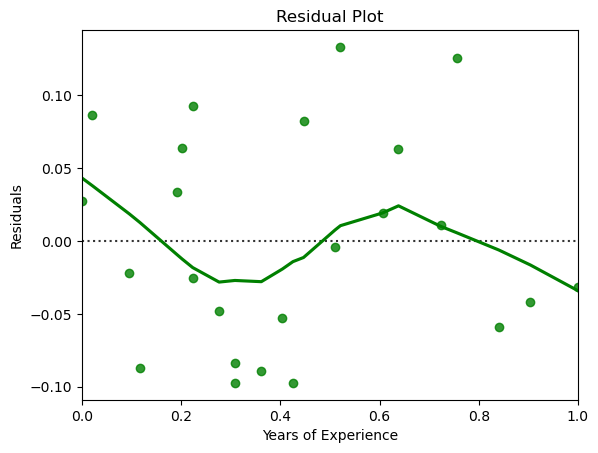

,ytrain,YTrain_predict,residuals
0,0.884763,0.926646,0.041883
1,0.213359,0.310647,0.097288
2,0.535755,0.453647,-0.082108
3,0.750898,0.739646,-0.011252
4,0.223376,0.189648,-0.033728


In [8]:
import seaborn as sns
dftrainPredictions=pd.DataFrame({"ytrain":ytrain,"YTrain_predict":YTrain_predict})
dftrainPredictions["residuals"]=dftrainPredictions["YTrain_predict"]-dftrainPredictions["ytrain"]


# Calculate the residuals
residuals = ytrain- YTrain_predict

# Plot the residuals using a residual plot
sns.residplot(x=xtrain, y=residuals, lowess=True, color='g')
plt.xlabel('Years of Experience')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
dftrainPredictions.head()

# . visualizing the Training set results:

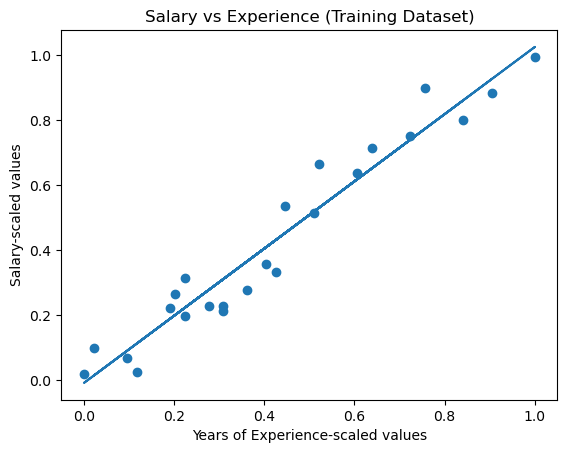

In [9]:
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,YTrain_predict)
plt.title("Salary vs Experience (Training Dataset)")  
plt.xlabel("Years of Experience-scaled values")  
plt.ylabel("Salary-scaled values")  
plt.show()

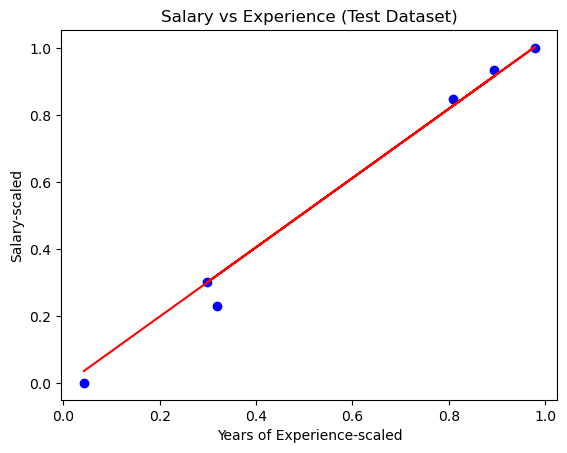

In [10]:
#visualizing the Test set results  
plt.scatter(xtest, ytest, color="blue")   
plt.plot(xtest, YTest_predict, color="red")    
plt.title("Salary vs Experience (Test Dataset)")  
plt.xlabel("Years of Experience-scaled")  
plt.ylabel("Salary-scaled")  
plt.show()  